# Análise de Dados Eleitorais de Parnamirim no 1o turno

### Conhecendo as bibliotecas do projeto

Para esse projeto será necessária a instalação das bibliotecas:
- pandas ([leia a documentação](https://pandas.pydata.org/docs/))
- matplotlib ([leia a documentação](https://matplotlib.org/stable/index.html))
- numpy ([leia a documentação](https://numpy.org/doc/stable/))

**ATENÇÃO**: Para entender melhor sobre os dados expressos na base de dados utilizada para a primeira parte, realize a leitura do arquivo .pdf intitulado, [leia-me](leiame.pdf). E para os dados utilizados na segunda parte, realize a leitura do arquivo .pdf intitulado, [leiame_boletim](leiame_boletim.pdf).

Para realizar a instalação das mesmas utilize o comando abaixo:

```pip install pandas matplotlib jupyter numpy```

### Instalando as bibliotecas que serão usadas

In [212]:
!pip install pandas matplotlib jupyter numpy


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Arquivos necessários

Essa análise será dividida em duas partes, inicialmente faremos um estudo detalhado afim de conhecer o **perfil do eleitor** e para isso utilizaremos o dataset disponibilizado pelo TSE no site dos dados abertos. Para realizar o download dos mesmos, [clique aqui](https://dadosabertos.tse.jus.br/dataset/eleitorado-atual/resource/804abd53-a825-4564-a604-80e1ab6ba3c0).

A segunda análise será ralizada em cima dos **boletins da urna do Rio Grande do Norte**. Esse conjunto de dados pode ser baixado [aqui](https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_1t_RN_051020221321.zip).


In [213]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [214]:
# Importando e visualizando os dados do perfil do eleitorado de todo estado

estado_RN = pd.read_csv("perfil_eleitor_secao_ATUAL_RN.csv", encoding='Latin 1',sep=";" )
estado_RN.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
964957,01/11/2022,03:40:49,9999,RN,16390,CAICÓ,-2,Não se aplica,25,35,...,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,0,0
463450,01/11/2022,03:40:49,9999,RN,16217,AREIA BRANCA,-2,Não se aplica,32,9,...,9,DIVORCIADO,6064,60 a 64 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0
1155121,01/11/2022,03:40:49,9999,RN,16454,CARAÚBAS,-2,Não se aplica,36,3,...,3,CASADO,8589,85 a 89 anos,1,ANALFABETO,1,1,0,0
1199161,01/11/2022,03:40:49,9999,RN,17795,PARNAMIRIM,-2,Não se aplica,50,42,...,1,SOLTEIRO,1800,18 anos,5,ENSINO MÉDIO INCOMPLETO,2,0,0,0
1234729,01/11/2022,03:40:49,9999,RN,16810,GOIANINHA,-2,Não se aplica,9,140,...,1,SOLTEIRO,1800,18 anos,5,ENSINO MÉDIO INCOMPLETO,1,0,0,0
43906,01/11/2022,03:40:49,9999,RN,16438,CANGUARETAMA,-2,Não se aplica,11,68,...,1,SOLTEIRO,3539,35 a 39 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0
994892,01/11/2022,03:40:49,9999,RN,16632,DOUTOR SEVERIANO,-2,Não se aplica,43,107,...,1,SOLTEIRO,7579,75 a 79 anos,2,LÊ E ESCREVE,2,2,0,0
153256,01/11/2022,03:40:49,9999,RN,17612,NATAL,-2,Não se aplica,1,15,...,1,SOLTEIRO,5054,50 a 54 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0
1031233,01/11/2022,03:40:49,9999,RN,17612,NATAL,-2,Não se aplica,4,390,...,3,CASADO,3034,30 a 34 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0
903756,01/11/2022,03:40:49,9999,RN,16616,CURRAIS NOVOS,-2,Não se aplica,20,174,...,3,CASADO,3539,35 a 39 anos,6,ENSINO MÉDIO COMPLETO,2,2,0,0


## Parte 1: Perfil do eleitorado para a cidade de Parnamirim

O perfil do eleitorado pode ser realizado por meio da escolha de alguns parametros presentes entre nosso conjunto de dados. Nesse caso serão selecionados:
- Zona Eleitoral (em Parnamim só existe uma)
- Número da seção
- Estado Civil
- Faixa Etária
- Grau de Escolaridade
- Qtd de Eleitores

A escolha das colunas desejadas é realizada através do comando abaixo:

In [215]:
# Filtrando os dados do eleitorado considerando apenas a cidade de Parnamirim
estado = pd.read_csv("perfil_eleitor_secao_ATUAL_RN.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "PARNAMIRIM"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')

municipio.sample(15)


,NR_ZONA,NR_SECAO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_INC_NM_SOCIAL
475424,50,493,SOLTEIRO,35 a 39 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0
224998,50,375,CASADO,55 a 59 anos,ENSINO MÉDIO INCOMPLETO,1,0
732328,50,144,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0
663757,50,94,DIVORCIADO,65 a 69 anos,ANALFABETO,1,0
443811,50,569,SOLTEIRO,21 a 24 anos,ENSINO MÉDIO COMPLETO,1,0
464049,50,336,CASADO,40 a 44 anos,SUPERIOR COMPLETO,1,0
82611,50,520,SOLTEIRO,85 a 89 anos,LÊ E ESCREVE,1,0
743167,50,87,SEPARADO JUDICIALMENTE,50 a 54 anos,LÊ E ESCREVE,1,0
223186,50,531,SOLTEIRO,40 a 44 anos,ENSINO MÉDIO INCOMPLETO,1,0
1073077,50,431,CASADO,55 a 59 anos,LÊ E ESCREVE,3,0


## Faixa Etária

Para conhecermos a faixa etária do eleitorado de Parnamirim, temos que considerar dois conjuntos de dado, considerando o dataset base, são eles a coluna da idade e a coluna de qtd de eleitores aptos a votar.

Agrupando esses dados e realizando a soma, podemos encontrar por grau de idade quantos eleitores aptos a votar temos

In [216]:
# Agrupando os eleitores aptos a votas de todas as seções eleitorais por idade 
FaixaEtaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
FaixaEtaria

DS_FAIXA_ETARIA
100 anos ou mais        7
16 anos               804
17 anos              1303
18 anos              2088
19 anos              2362
20 anos              2647
21 a 24 anos        11732
25 a 29 anos        14739
30 a 34 anos        14425
35 a 39 anos        14840
40 a 44 anos        14613
45 a 49 anos        12789
50 a 54 anos        11633
55 a 59 anos        10626
60 a 64 anos         8128
65 a 69 anos         5579
70 a 74 anos         4136
75 a 79 anos         2203
80 a 84 anos         1227
85 a 89 anos          530
90 a 94 anos          188
95 a 99 anos           53
Inválido                3
Name: QT_ELEITORES_PERFIL, dtype: int64

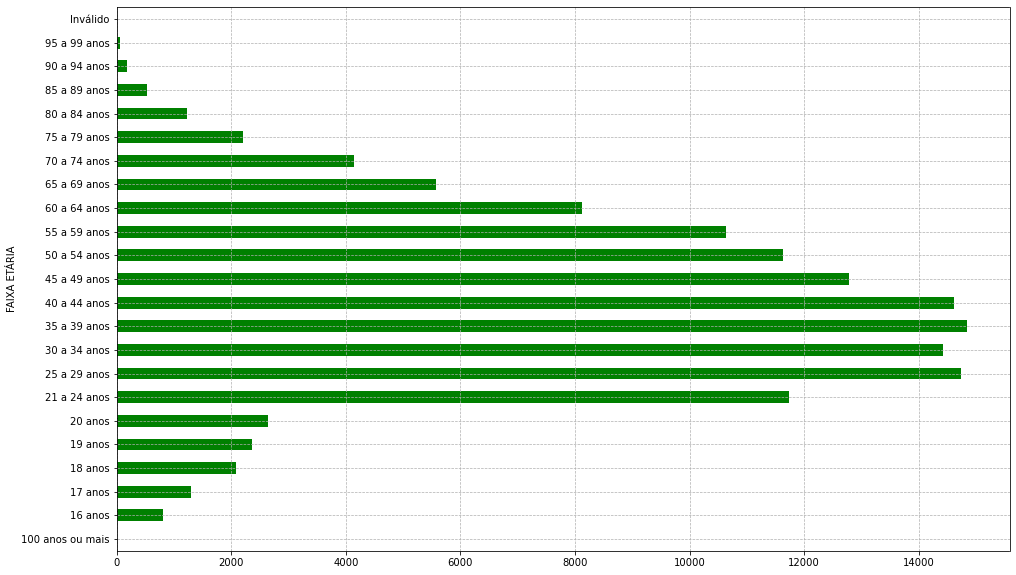

In [217]:
FaixaEtaria.plot(kind='barh',color='Green',figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = '--', linewidth = 0.7)

## Agrupamento da faixa etária

Visando melhorar a visualização do conjunto de dados, os eleitores serão agrupados por idade em três grupos:
- jovem
- adulto
- idoso

Esse agrupamento seguirá os critérios mostrados abaixo:

In [218]:
Jovem = FaixaEtaria[1:8]  # 16 anos até 29 anos
Adulto = FaixaEtaria[8:14]  # 30 anos até 59
Idoso = FaixaEtaria[14:22]  # 60 até 99 + 100anos ou mais

FaixasIdade = pd.DataFrame({'Manaus':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(FaixaEtaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
FaixasIdade

,Manaus
Jovens até 29 anos,35675
Adultos,78926
Idosos a partir de 60,22051


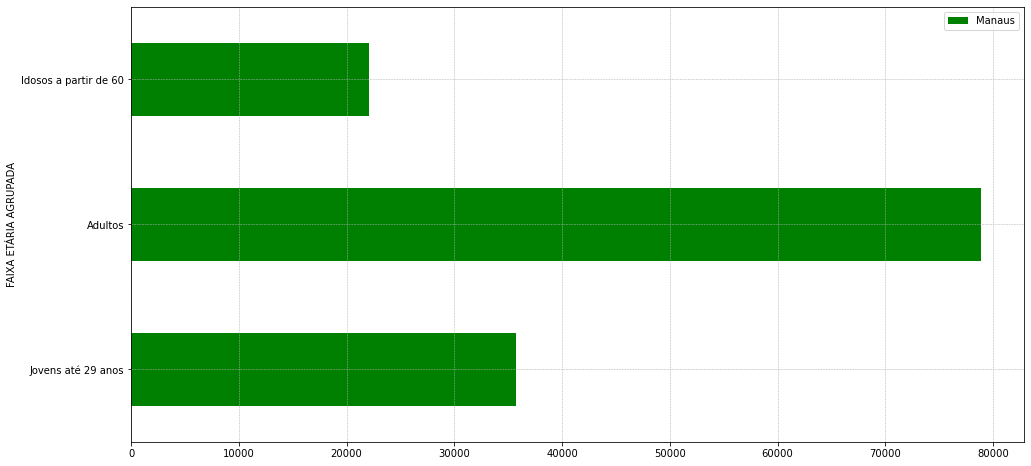

In [219]:
FaixasIdade.plot(kind='barh',color='Green',figsize=(16,8))
plt.ylabel('FAIXA ETÁRIA AGRUPADA')
plt.grid(linestyle = '--', linewidth = 0.5)

## Seções eleitorais com mais jovens e mais idosos


In [220]:
# 16 anos até 29 anos
jovens = {}  

for secao in municipio.NR_SECAO.unique():
    result = municipio.query('NR_SECAO == @secao').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[secao] = result[1:8].sum()
for secao in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    print (f'Secão eleitoral {secao}: {jovens[secao]}')

Secão eleitoral 307: 296
Secão eleitoral 333: 294
Secão eleitoral 553: 291
Secão eleitoral 346: 289
Secão eleitoral 564: 289
Secão eleitoral 342: 277
Secão eleitoral 273: 272
Secão eleitoral 565: 272
Secão eleitoral 114: 269
Secão eleitoral 433: 266
Secão eleitoral 281: 265
Secão eleitoral 172: 265
Secão eleitoral 338: 263
Secão eleitoral 324: 262
Secão eleitoral 118: 259
Secão eleitoral 131: 258
Secão eleitoral 206: 256
Secão eleitoral 370: 254
Secão eleitoral 483: 254
Secão eleitoral 536: 251
Secão eleitoral 549: 249
Secão eleitoral 563: 248
Secão eleitoral 372: 247
Secão eleitoral 486: 247
Secão eleitoral 321: 245
Secão eleitoral 474: 245
Secão eleitoral 485: 245
Secão eleitoral 87: 245
Secão eleitoral 484: 244
Secão eleitoral 550: 244
Secão eleitoral 108: 244
Secão eleitoral 213: 243
Secão eleitoral 371: 242
Secão eleitoral 186: 240
Secão eleitoral 205: 239
Secão eleitoral 566: 237
Secão eleitoral 133: 237
Secão eleitoral 334: 236
Secão eleitoral 558: 235
Secão eleitoral 88: 235
Se

In [221]:
# 60 até 99 + 100anos ou mais
idosos = {}
for secao in municipio.NR_SECAO.unique():
    result = municipio.query('NR_SECAO == @secao').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[secao] = result[14:22].sum() + int(result[0])
for secao in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Seção eleitoral {secao}: {idosos[secao]}')

Seção eleitoral 397: 91
Seção eleitoral 493: 87
Seção eleitoral 47: 82
Seção eleitoral 510: 78
Seção eleitoral 39: 77
Seção eleitoral 52: 71
Seção eleitoral 401: 67
Seção eleitoral 516: 67
Seção eleitoral 494: 63
Seção eleitoral 297: 61
Seção eleitoral 502: 61
Seção eleitoral 41: 59
Seção eleitoral 380: 58
Seção eleitoral 40: 58
Seção eleitoral 51: 58
Seção eleitoral 330: 57
Seção eleitoral 506: 56
Seção eleitoral 514: 56
Seção eleitoral 50: 56
Seção eleitoral 398: 55
Seção eleitoral 528: 55
Seção eleitoral 360: 54
Seção eleitoral 496: 54
Seção eleitoral 250: 53
Seção eleitoral 391: 53
Seção eleitoral 412: 53
Seção eleitoral 444: 53
Seção eleitoral 382: 52
Seção eleitoral 399: 52
Seção eleitoral 49: 52
Seção eleitoral 357: 51
Seção eleitoral 361: 51
Seção eleitoral 530: 51
Seção eleitoral 375: 50
Seção eleitoral 45: 50
Seção eleitoral 155: 50
Seção eleitoral 366: 49
Seção eleitoral 512: 49
Seção eleitoral 515: 49
Seção eleitoral 532: 49
Seção eleitoral 46: 49
Seção eleitoral 42: 48
Seç

## Estado Civil

In [222]:
EstadoCivil = municipio.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)
EstadoCivil

DS_ESTADO_CIVIL
SOLTEIRO                  77721
CASADO                    48514
DIVORCIADO                 6335
VIÚVO                      3102
SEPARADO JUDICIALMENTE      983
Name: QT_ELEITORES_PERFIL, dtype: int64

## Escolaridade

In [223]:
Escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)
Escolaridade

DS_GRAU_ESCOLARIDADE
ENSINO MÉDIO COMPLETO            43457
ENSINO FUNDAMENTAL INCOMPLETO    24561
ENSINO MÉDIO INCOMPLETO          21096
SUPERIOR COMPLETO                19886
SUPERIOR INCOMPLETO              10947
LÊ E ESCREVE                      8074
ENSINO FUNDAMENTAL COMPLETO       5459
ANALFABETO                        3175
Name: QT_ELEITORES_PERFIL, dtype: int64

## Nome social

In [224]:
NomeSocial = municipio.groupby(['QT_ELEITORES_INC_NM_SOCIAL'])['QT_ELEITORES_PERFIL'].count()
NomeSocial[1]

55

## Quantidade de pessoas que utilizam nome social

In [225]:
nome_social = {}

for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('QT_ELEITORES_INC_NM_SOCIAL')['QT_ELEITORES_PERFIL'].count()
    nome_social[zona] = result[1]
for zona in sorted(nome_social, key=lambda x:nome_social[x], reverse = True):
    print (f'Zona eleitoral {zona}: {nome_social[zona]}')

Zona eleitoral 50: 55
